In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df['good_quality'] = np.where(df.quality >= 6, 1, 0)

# Daniela edits

Visualizations

Text(0,0.5,'Wine Quality Frequency')

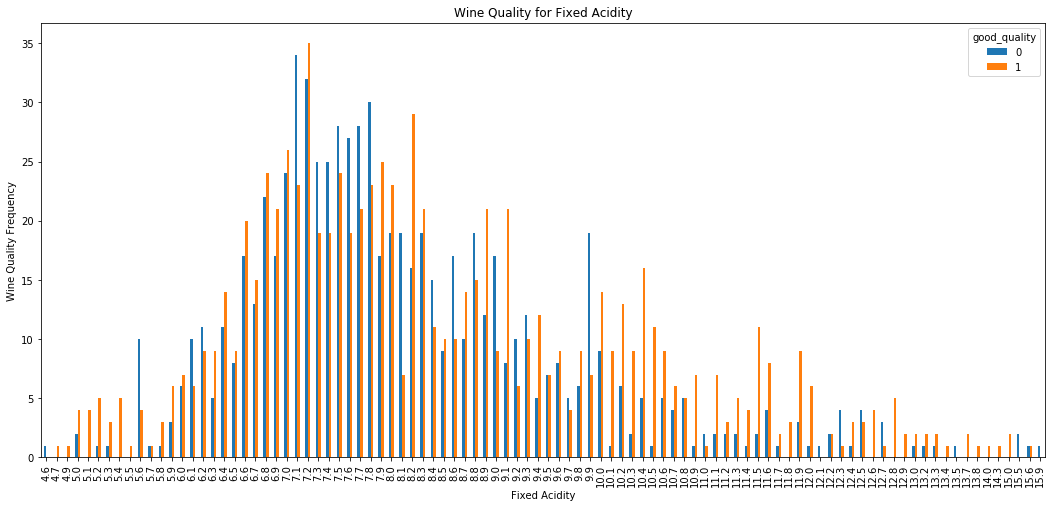

In [6]:
%matplotlib inline
pd.crosstab(round(df['fixed acidity'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Wine Quality Frequency')

Text(0,0.5,'Wine Quality Frequency')

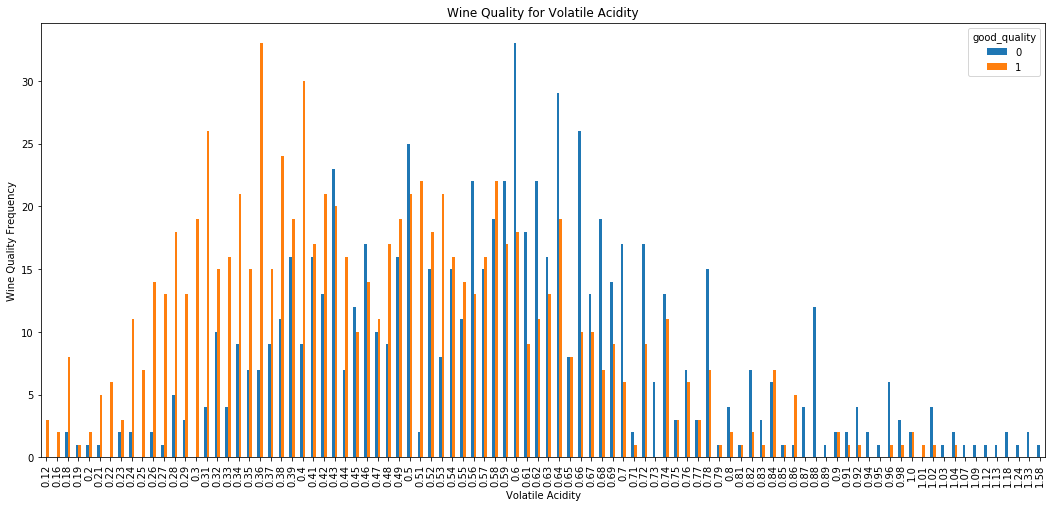

In [7]:
pd.crosstab(round(df['volatile acidity'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Wine Quality Frequency')

Text(0,0.5,'Wine Quality Frequency')

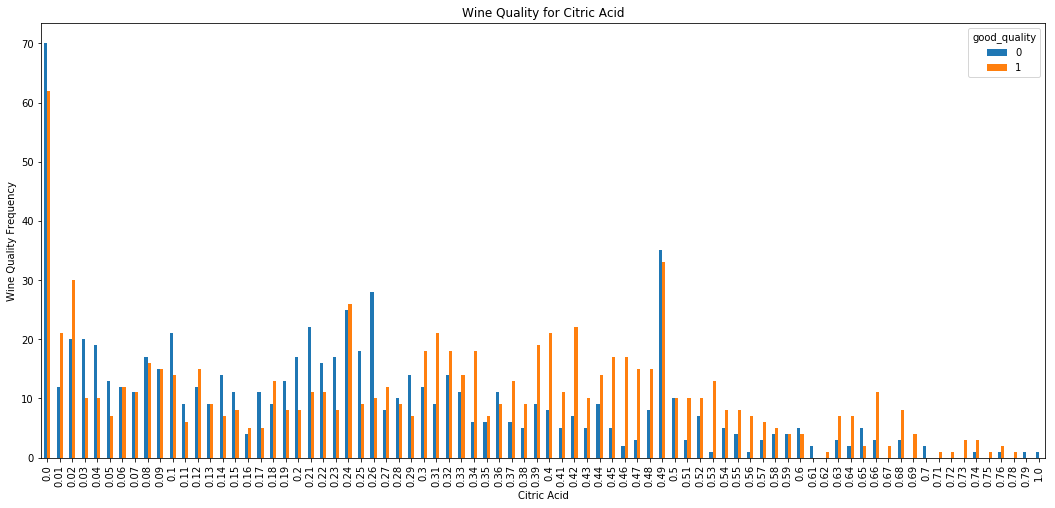

In [8]:
pd.crosstab(df['citric acid'],df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Wine Quality Frequency')

Text(0,0.5,'Wine Quality Frequency')

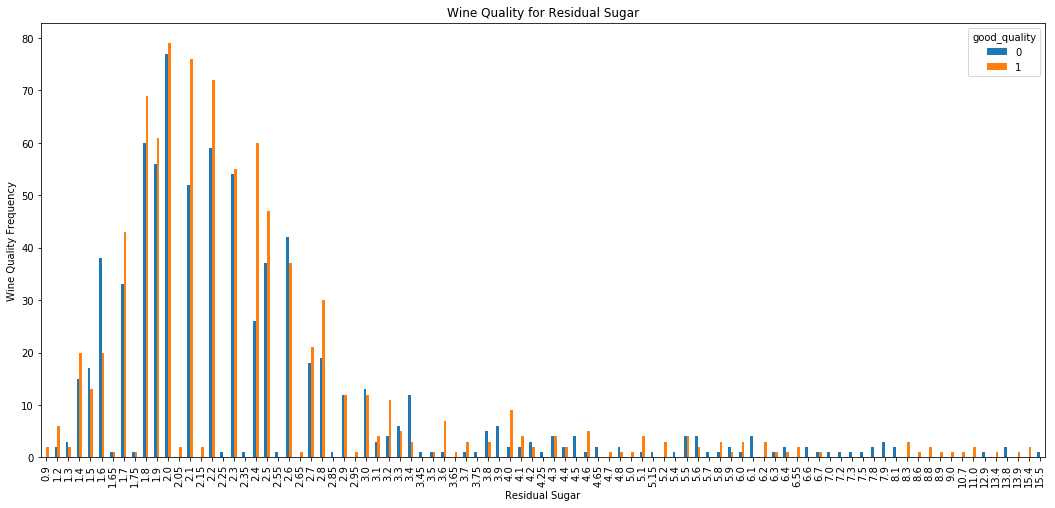

In [9]:
pd.crosstab(round(df['residual sugar'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Wine Quality Frequency')

Text(0,0.5,'Quality Wine Frequency')

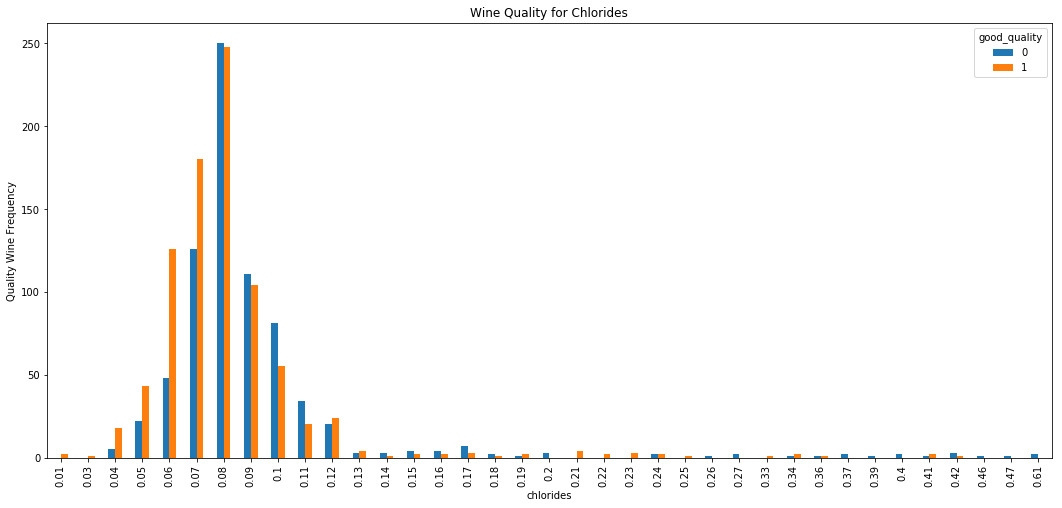

In [10]:
pd.crosstab(round(df['chlorides'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Chlorides')
plt.xlabel('chlorides')
plt.ylabel('Quality Wine Frequency')

Text(0,0.5,'Quality Wine Frequency')

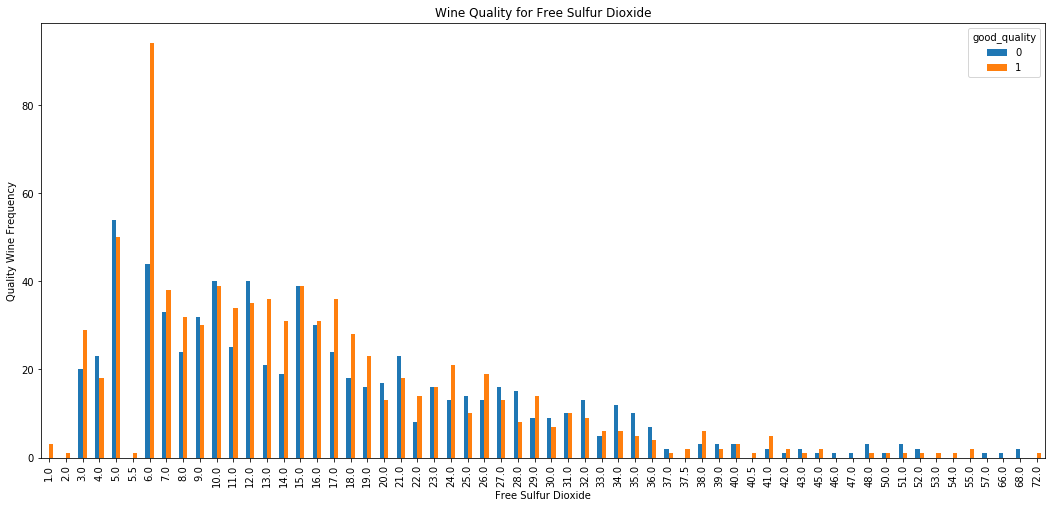

In [11]:
pd.crosstab(round(df['free sulfur dioxide'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Free Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Quality Wine Frequency')

Text(0,0.5,'Quality Wine Frequency')

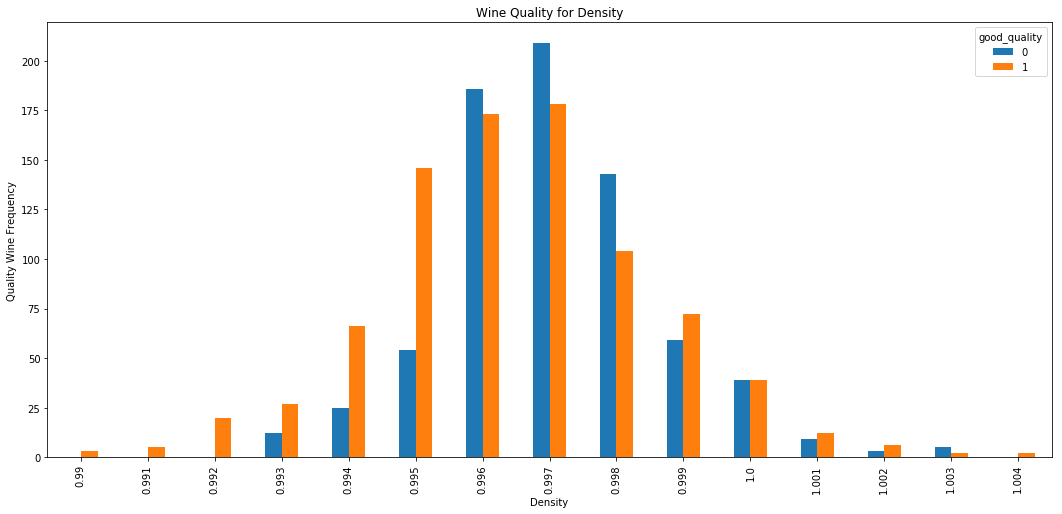

In [12]:
pd.crosstab(round(df['density'],3),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Density')
plt.xlabel('Density')
plt.ylabel('Quality Wine Frequency')

Text(0,0.5,'Quality Wine Frequency')

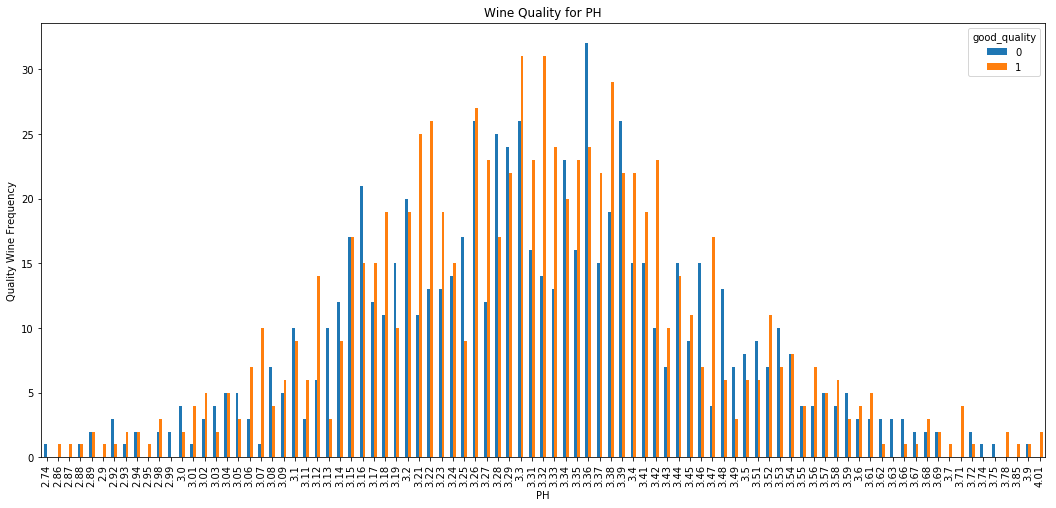

In [13]:
pd.crosstab(round(df['pH'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for PH')
plt.xlabel('PH')
plt.ylabel('Quality Wine Frequency')

Text(0,0.5,'Quality Wine Frequency')

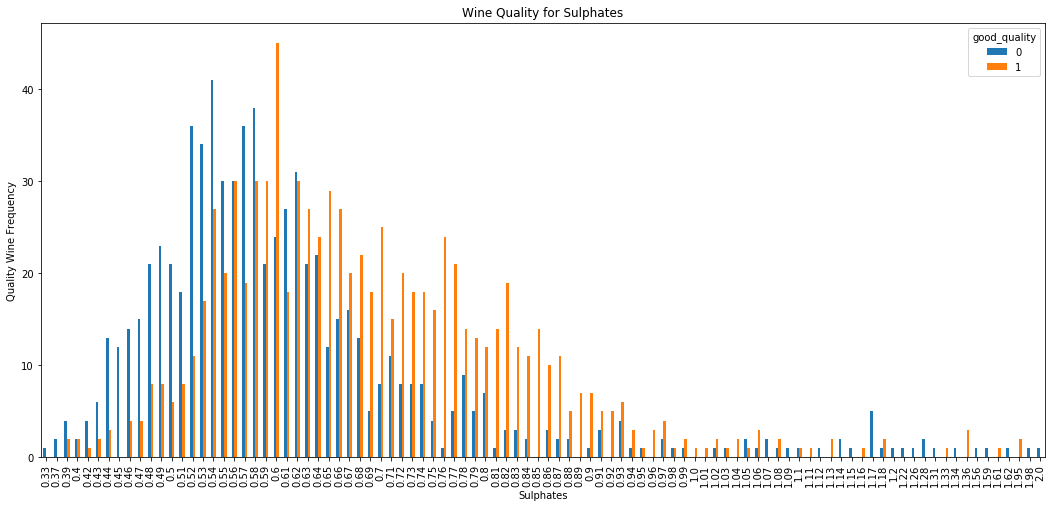

In [14]:
pd.crosstab(round(df['sulphates'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Quality Wine Frequency')

Text(0,0.5,'Quality Wine Frequency')

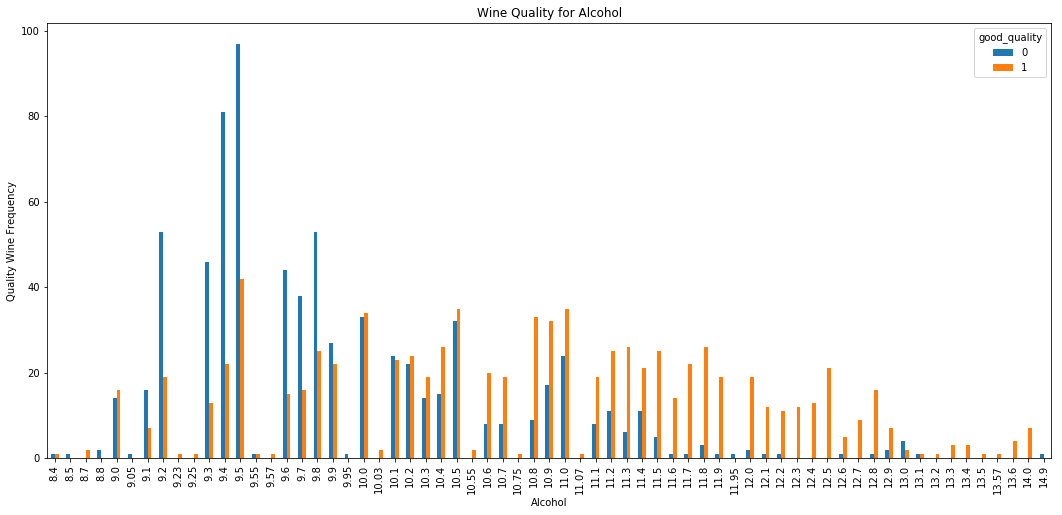

In [15]:
pd.crosstab(round(df['alcohol'],2),df.good_quality).plot(kind='bar', figsize=(18,8))
plt.title('Wine Quality for Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality Wine Frequency')

# end edits Daniela

# Hador Edits

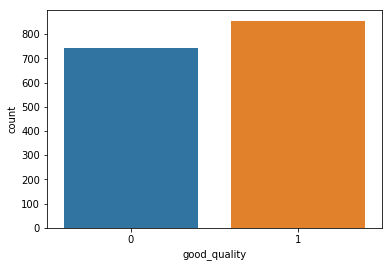

In [16]:
sns.countplot(x = 'good_quality', data = df)
plt.show()

In [17]:
p_good = len(df[df['good_quality'] == 1])/len(df['good_quality'])
p_poor = len(df[df['good_quality'] == 0])/len(df['good_quality'])
print('The percentage of good quality wine is', round(p_good*100,2),'%')
print('The percentage of poor quality wine is', round(p_poor*100,2),'%')


The percentage of good quality wine is 53.47 %
The percentage of poor quality wine is 46.53 %


In [18]:
df.groupby('good_quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
good_quality                                                                 
0                  8.142204          0.589503     0.237755        2.542070   
1                  8.474035          0.474146     0.299883        2.535965   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
good_quality                                                                   
0              0.092989            16.567204             54.645161  0.997068   
1              0.082661            15.272515             39.352047  0.996467   

                    pH  sulphates    alcohol   quality  
good_quality                                            
0             3.311653   0.618535   9.926478  4.901882  
1             3.310643   0.692620  10.855029  6.274854

### POTENTIAL Hypothesis???

null: slopes are all 0 (none of the variable affect quality)

alternate: f acid, v acid, c acid, chlor, f s diox, t s diox, sulphates, alcohol affect quality

- judging by the difference in means from above (eye balling)

# End Hador Edits

In [19]:
X = df.drop(['good_quality', 'quality'], axis = 1) # Features
Y = df['good_quality'] # Target variable

In [20]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [21]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [22]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.250      
Dependent Variable:  good_quality      AIC:               1677.9172  
Date:                2018-11-21 21:38  BIC:               1737.0656  
No. Observations:    1599              Log-Likelihood:    -827.96    
Df Model:            10                LL-Null:           -1104.5    
Df Residuals:        1588              LLR p-value:       1.9883e-112
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.0952   0.0632  1.5075 0.1317  -0.0286  0.2190
volatile acidity

In [24]:
Y_Pred = classifier.predict(X_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_Test, Y_Test)))

Accuracy of logistic regression classifier on test set: 0.76


In [25]:
Y_Pred = classifier.predict(X_Test)
cm = confusion_matrix(Y_Test, Y_Pred)

Text(0.5,257.44,'Predicted label')

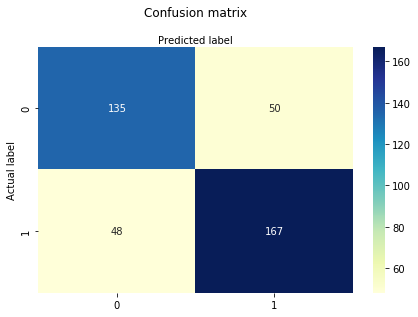

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The result is telling us that we have 135+167 correct predictions and 48+50 incorrect predictions.  


The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

# Hador Edits (backward selection based on p-value)

In [27]:
#removing reisdual sugar - p-value = 0.3792
X1 = df.drop(['good_quality', 'quality', 'residual sugar'], axis = 1) # Features
Y1 = df['good_quality'] # Target variable

In [28]:
X1_Train, X1_Test, Y1_Train, Y1_Test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [29]:
sc_X1 = StandardScaler()
X1_Train = sc_X1.fit_transform(X1_Train)
X1_Test = sc_X1.transform(X1_Test)

In [30]:
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X1_Train, Y1_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.518038
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.250      
Dependent Variable:  good_quality      AIC:               1676.6861  
Date:                2018-11-21 21:38  BIC:               1730.4574  
No. Observations:    1599              Log-Likelihood:    -828.34    
Df Model:            9                 LL-Null:           -1104.5    
Df Residuals:        1589              LLR p-value:       3.5996e-113
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.0967   0.0631  1.5321 0.1255  -0.0270  0.2205
volatile acidity

In [32]:
Y1_Pred = classifier1.predict(X1_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier1.score(X1_Test, Y1_Test)))

Accuracy of logistic regression classifier on test set: 0.76


In [33]:
Y1_Pred = classifier1.predict(X1_Test)
cm1 = confusion_matrix(Y1_Test, Y1_Pred)

Text(0.5,257.44,'Predicted label')

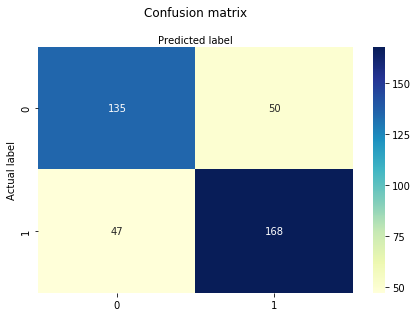

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
#removing pH - p-value = 0.3171
X2 = df.drop(['good_quality', 'quality', 'residual sugar', 'pH'], axis = 1) # Features
Y2 = df['good_quality'] # Target variable

In [36]:
X2_Train, X2_Test, Y2_Train, Y2_Test = train_test_split(X2, Y2, test_size = 0.25, random_state = 0)

In [37]:
sc_X2 = StandardScaler()
X2_Train = sc_X2.fit_transform(X2_Train)
X2_Test = sc_X2.transform(X2_Test)

In [38]:
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X2_Train, Y2_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
logit_model=sm.Logit(Y2,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.518351
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.250      
Dependent Variable:  good_quality      AIC:               1675.6858  
Date:                2018-11-21 21:38  BIC:               1724.0800  
No. Observations:    1599              Log-Likelihood:    -828.84    
Df Model:            8                 LL-Null:           -1104.5    
Df Residuals:        1590              LLR p-value:       6.8728e-114
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.1336   0.0514  2.5999 0.0093   0.0329  0.2343
volatile acidity

In [40]:
Y2_Pred = classifier2.predict(X2_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier2.score(X2_Test, Y2_Test)))

Accuracy of logistic regression classifier on test set: 0.76


In [41]:
Y2_Pred = classifier2.predict(X2_Test)
cm2 = confusion_matrix(Y2_Test, Y2_Pred)

Text(0.5,257.44,'Predicted label')

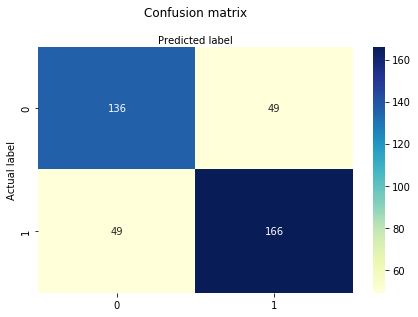

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# End Hador edits

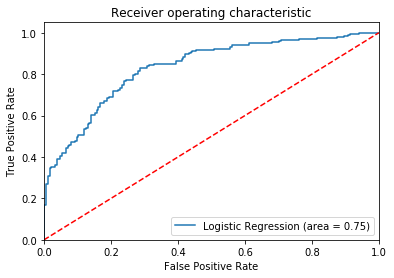

In [43]:
logit_roc_auc2 = roc_auc_score(Y2_Test, classifier2.predict(X2_Test))
fpr2, tpr2, thresholds2 = roc_curve(Y2_Test, classifier2.predict_proba(X2_Test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Interpretation: Of the entire test set, 76% of the good quality of wine is afected by volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol


ROC Curve

# Daniela Code

predictors2 = ['volatile acidity', 'chlorides', 'free sulfur dioxide',
                'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X2 = df[predictors2] # Features
Y2 = df['good_quality'] # Target variable

X2_Train, X2_Test, Y2_Train, Y2_Test = train_test_split(X2, Y2, test_size = 0.25, random_state = 0)

sc_X = StandardScaler()
X2_Train = sc_X.fit_transform(X2_Train)
X2_Test = sc_X.transform(X2_Test)

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X2_Train, Y2_Train)

logit_model=sm.Logit(Y2,X2)
result=logit_model.fit()
print(result.summary2())

Y2_Pred = classifier2.predict(X2_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier2.score(X2_Test, Y2_Test)))

cm2 = confusion_matrix(Y2_Test, Y2_Pred)

cm2

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The result is telling us that we have 137+169 correct predictions and 46+48 incorrect predictions.

From Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

In [44]:
print(classification_report(Y2_Test, Y2_Pred))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74       185
          1       0.77      0.77      0.77       215

avg / total       0.76      0.76      0.76       400



Interpretation: Of the entire test set, 76% of the good quality of wine is afected by volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol


ROC Curve

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).   
end edits Daniela

# End Daniela Code

# <p>GB edits:</p> Result comparison between both models

### Gabriel: Add for the thrid model as well

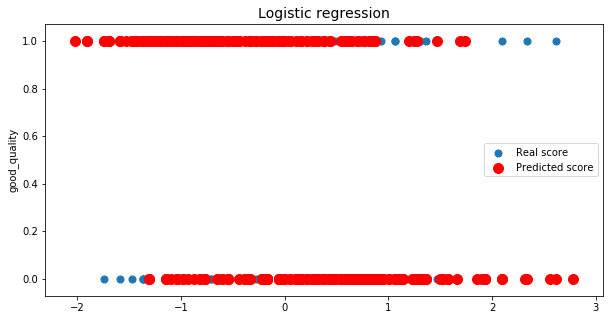

In [45]:
# Results of Logistic regression using Hador's model
f = plt.figure(figsize=(10,5))
plt.scatter(X_Test[:,1], Y_Test, s=50,label="Real score");
plt.scatter(X_Test[:,1], Y_Pred,s=100, c='r',label="Predicted score");
plt.title('Logistic regression', fontsize=14)
plt.ylabel("good_quality");
plt.legend(loc="center right")

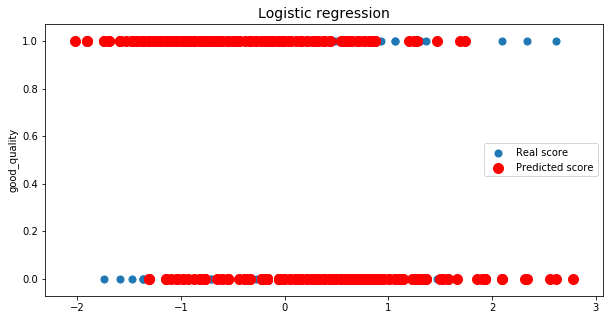

In [47]:
# Results of Logistic regression using Daniela's model
f = plt.figure(figsize=(10,5))
plt.scatter(X1_Test[:,1], Y1_Test, s=50,label="Real score");
plt.scatter(X1_Test[:,1], Y1_Pred,s=100, c='r',label="Predicted score");
plt.title('Logistic regression', fontsize=14)
plt.ylabel("good_quality");
plt.legend(loc="center right")

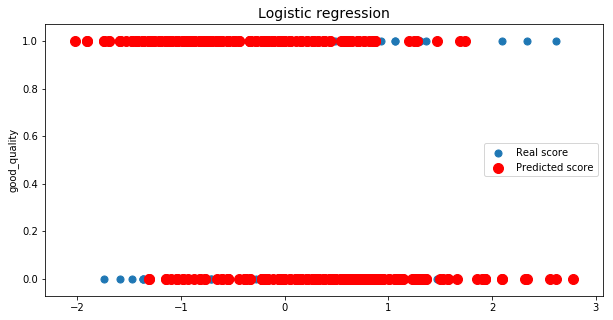

In [48]:
# Results of Logistic regression using Daniela's model
f = plt.figure(figsize=(10,5))
plt.scatter(X2_Test[:,1], Y2_Test, s=50,label="Real score");
plt.scatter(X2_Test[:,1], Y2_Pred,s=100, c='r',label="Predicted score");
plt.title('Logistic regression', fontsize=14)
plt.ylabel("good_quality");
plt.legend(loc="center right")

Text(0.5,0,'Relative Feature Importance')

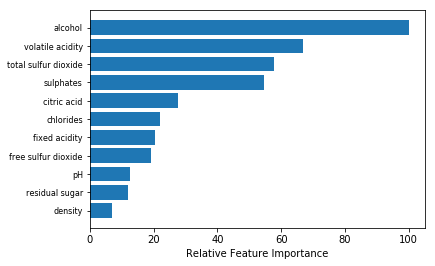

In [49]:
feature_importance = abs(classifier.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

Text(0.5,0,'Relative Feature Importance')

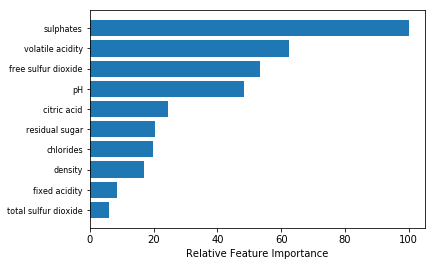

In [50]:
feature_importance = abs(classifier1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

Text(0.5,0,'Relative Feature Importance')

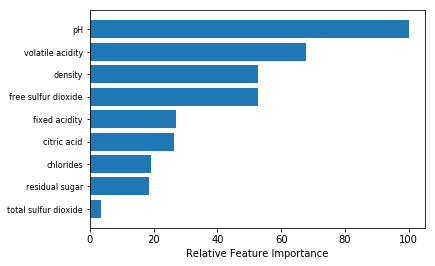

In [51]:
feature_importance = abs(classifier2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')